THIS IS AN EXAMPLE ABOUT HOW TO DOWNLOAD A DATABASE, CREATE A PICKLE FILE AND THEN LOAD IT INTO A NETWORK

In [1]:
#first import pypath and the omnipath module

from pypath.core import network
from pypath.resources import data_formats as netres
from pypath import omnipath

In [2]:
#then import the wrapper

from pypath_wrapper import Wrap_net

In [3]:
w = Wrap_net()

#here we create the wrap_net object, which is the same as Network() but with a couple of functions more

In [ ]:
#here we load the database to populate the wrap_net object. It can be done in two ways:

#1) using the "netres" object
netres.omnipath

#in the output of the cells you can visualize the database that will populate your wrapnet object

In [ ]:
#to load the previous databses just do:

w.load(netres.pathway)

#the load methods, loads the databases contained in the netres object

In [ ]:
netres.pathway.keys()

In [ ]:
#2) an alternative is using the omnipath object

#the following lines will download the chosen databases, populate the cache folder and create a pickle file

#the first time this will take a lot of time because it will download Gb of data

#after the first time, it will take just a couple of seconds

omnipath.db.param['network_omnipath_mod'] = 'network' 

#use the following line if you want to specify some arguments and load just one or some databases (ex signor, kegg etc...)
omnipath.db.param['network_omnipath_args'] = {'resources': netres.pathway['signor']} # <-- insert in the dict the pathway

#get the actual files necessary to build the database

omnipath.db.get_db('network_omnipath')

In [4]:
#next time when you want to launch the session rapidly you can just use:

m = omnipath.db.pickle_path('network_omnipath') #here you store the pickle file in the variable "m" in order to load it next

In [5]:
#once the pickle file is created, let's load it into the new object

w = Wrap_net(m)

In [6]:
#now let's check its dimensions
w

<Network: 19136 nodes, 107134 interactions>

In [7]:
#and let's have a look to the interactions:
w.interactions

{(<Entity: CALM3>,
  <Entity: TRPC1>): <Interaction: CALM3 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: CALM2>,
  <Entity: TRPC1>): <Interaction: CALM2 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: CALM1>,
  <Entity: TRPC1>): <Interaction: CALM1 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: TRPC1>,
  <Entity: CAV1>): <Interaction: TRPC1 <=(+)======== CAV1 [Evidences: DIP, HPRD, IntAct, Lit-BM-17, TRIP (8 references)]>,
 (<Entity: DRD2>,
  <Entity: TRPC1>): <Interaction: DRD2 =======(+)==> TRPC1 [Evidences: TRIP (1 references)]>,
 (<Entity: TRPC1>,
  <Entity: HOMER1>): <Interaction: TRPC1 ============= HOMER1 [Evidences: HPRD, TRIP (3 references)]>,
 (<Entity: TRPC1>,
  <Entity: MDFI>): <Interaction: TRPC1 <=(-)======== MDFI [Evidences: HPRD, TRIP (2 references)]>,
 (<Entity: TRPC1>,
  <Entity: ITPR2>): <Interaction: TRPC1 <=(+)======== ITPR2 [Evidences: HPRD, TRIP (11 references)]>,
 (<Entity: TRPC1>,
  <Entity: ITPR3>): <Int

SECOND PART: FROM A LIST OF GENES TO A BNET FILE

In [8]:
#let's create a list of genes

genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4"]
#genes = ["DDR1", "DDR2", "SMAD1", "SMAD2", "SMAD4", "MAPK1", "MAPK3", "NFKB1", "NFKB2"]
#genes = ["KRAS", "CDC6", "PIK3CA"]
#genes = ['AKT1', 'ATM', 'BRAF', 'BRCA1', 'BRCA2', 'CASP3', 'CD24', 'CD44', 'CDC25A', 'CDC25B', 'CDC25C', 'CDK1', 'CDK2', 'CHEK1', 'CHEK2', 'CHUK', 'CLSPN', 'CTNNB1', 'DAPK1', 'DPYD', 'EGFR', 'EPHA3', 'EPHB2', 'ERBB3', 'ERBB4', 'ERK1', 'ERK2', 'NFKBIA', 'IKBKB', 'KRAS', 'KRT20', 'MAP2K1', 'MAP2K2', 'MAPK1', 'MAPK14', 'MAPK3', 'MAPKAPK2', 'MEK1', 'MEK2', 'RELA', 'NOTCH1', 'NOTCH3', 'NRAS', 'PARP', 'PIK3CA', 'PKMYT1', 'RAD51', 'RPS6', 'SMAD1', 'SMAD2', 'SMAD4', 'TGFBR2', 'TP53', 'VIM', 'WEE1', 'YAP']


In [9]:
from pypath.utils import mapping

for gene in genes:
    uniprot = list(mapping.map_name(gene, 'genesymbol', 'uniprot'))
    genesymbol = list(mapping.map_name(uniprot[0], 'uniprot', 'genesymbol'))
    print(uniprot, genesymbol)

['P12931'] ['SRC']
['P46531'] ['NOTCH1']
['Q05397'] ['PTK2']
['P12830'] ['CDH1']
['P19022'] ['CDH2']
['P08670'] ['VIM']
['O95819'] ['MAP4K4']


In [10]:
#and now let's extract a subnetwork from our wrap_net object that contains the interactions between those genes

#let's propose a max distance between each gene, in this case, let's say 1

distance = 1

new_net = w.extract_subnet(genes, distance, complete_connections=False, resources="SIGNOR")

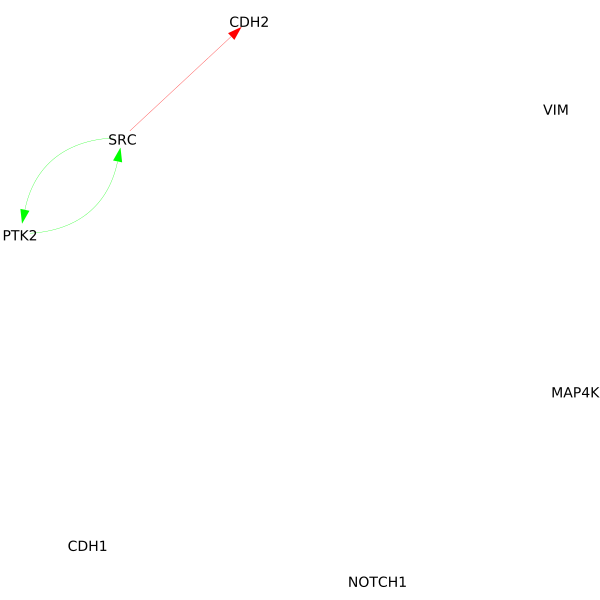

In [11]:
#let's check the new net

new_net.generate_graph()
new_net.print_graph()

In [12]:
#the previous graph shows some disconnected nodes, this is normal because not every gene/protein is in direct
#connection with the other ones
#So now, let's use the "complete_connections" flag in 'soft' mode

#this flag will trigger a function that adds JUST the FIRST shortest path that can connect all the nodes

#let's call this network the "minimum connected network"

distance = 1

new_net = w.extract_subnet(genes, distance, complete_connections="soft", resources="SIGNOR")

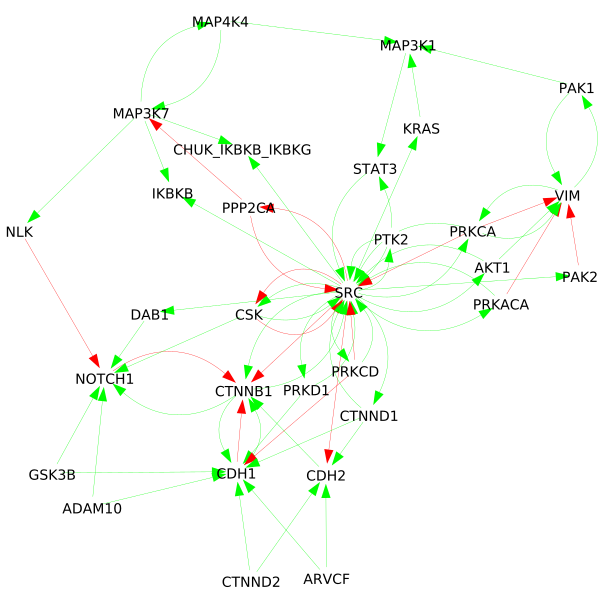

In [13]:
#let's check the new net

new_net.generate_graph()
new_net.print_graph()

In [14]:
#the previous network already include a good number of genes

#but sometimes, when working on some biological context, those genes are not enough.

#this time we want to enrich even more the network to find any possible gene that could be implicated in our study

#to do this, let's use again the flag "complete_connections" setting it on True

#this will trigger a function that will look for a possible path between every couple of genes
#rising by a lot the number of final nodes in the network (WARNING: IT COULD TAKES A WHILE)

distance = 1

new_net = w.extract_subnet(genes, distance, complete_connections=True, resources="SIGNOR")

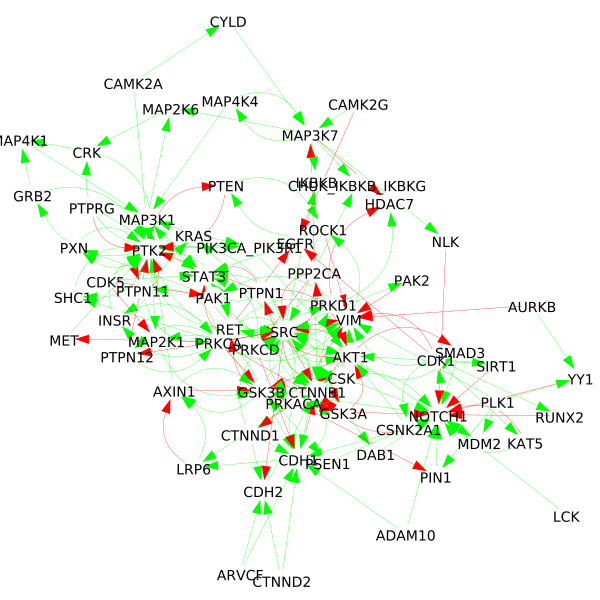

In [15]:
#let's check the new net

new_net.generate_graph()
new_net.print_graph()

In [17]:
#Now, let's say that I have a big network and I need all the connected genes to a specific one, here is how to 
# retrieve them:

a = new_net.get_neighbours("MAP4K4")
print(a)

['MAP3K1', 'MAP3K7']


In [ ]:
# and now let's export our network to a bnet file in order to use it with MaBoSS and friends

new_net.write_bnet()

In [62]:
inter = new_net.interaction_by_label("CDK5", "MAP2K1")

True

In [30]:
path = new_net.find_paths(["KRAS", "SRC"])

path

[[<Entity: KRAS>, <Entity: PIK3CA_PIK3R1>, <Entity: AKT1>],
 [<Entity: KRAS>, <Entity: MAP3K1>, <Entity: MAP2K6>],
 [<Entity: KRAS>, <Entity: MAP3K1>, <Entity: MAP2K1>],
 [<Entity: KRAS>, <Entity: MAP3K1>, <Entity: MAP4K4>],
 [<Entity: KRAS>, <Entity: MAP3K1>, <Entity: STAT3>],
 [<Entity: SRC>, <Entity: CTNNB1>, <Entity: CDH1>],
 [<Entity: SRC>, <Entity: CTNNB1>, <Entity: NOTCH1>],
 [<Entity: SRC>, <Entity: KRAS>, <Entity: PIK3CA_PIK3R1>],
 [<Entity: SRC>, <Entity: KRAS>, <Entity: MAP3K1>],
 [<Entity: SRC>, <Entity: STAT3>, <Entity: EGFR>],
 [<Entity: SRC>, <Entity: PRKD1>, <Entity: CDH1>],
 [<Entity: SRC>, <Entity: PRKD1>, <Entity: HDAC7>],
 [<Entity: SRC>, <Entity: PAK2>, <Entity: VIM>],
 [<Entity: SRC>, <Entity: CSK>, <Entity: NOTCH1>],
 [<Entity: SRC>, <Entity: CSK>, <Entity: PRKACA>],
 [<Entity: SRC>, <Entity: PTK2>, <Entity: PIK3CA_PIK3R1>],
 [<Entity: SRC>, <Entity: PTK2>, <Entity: PXN>],
 [<Entity: SRC>, <Entity: PTK2>, <Entity: PTPN1>],
 [<Entity: SRC>, <Entity: PTK2>, <Entity

In [28]:
src = new_net.entity_by_label("CDK5")

In [29]:
src.

=====> [1 proteins] <=====
╒═══════╤════════╤══════════════╤══════════╤══════════╤═════════════╤══════════════╤════════════╤══════════════╕
│   No. │ ac     │ genesymbol   │   length │   weight │ full_name   │ function_o   │ keywords   │ subcellula   │
│       │        │              │          │          │             │ r_genecard   │            │ r_location   │
│       │        │              │          │          │             │ s            │            │              │
╞═══════╪════════╪══════════════╪══════════╪══════════╪═════════════╪══════════════╪════════════╪══════════════╡
│     1 │ Q00535 │ CDK5         │      292 │    33304 │ Cyclin-     │ Proline-     │ 3D-        │ [Isoform     │
│       │        │              │          │          │ dependent   │ directed s   │ structure, │ 1]:          │
│       │        │              │          │          │ kinase 5    │ erine/thre   │ Acetylatio │ Cytoplasm.   │
│       │        │              │          │          │             │

In [26]:
a = new_net.generate_df()

In [50]:
a

,id_a,id_b,type_a,type_b,directed,effect,type,dmodel,sources,references
0,SRC,PTK2,protein,protein,True,1,post_translational,"{activity_flow, enzyme_substrate, interaction}","{Wang, SIGNOR, SPIKE_LC, Adhesome, KEGG}",NaN
1,SRC,PTK2,protein,protein,True,0,post_translational,"{activity_flow, enzyme_substrate, interaction}","{dbPTM, HPRD-phos, Li2012, phosphoELM, MIMP, P...",NaN
2,PTK2,SRC,protein,protein,True,1,post_translational,"{activity_flow, enzyme_substrate, interaction}","{KEGG, Adhesome}",NaN
3,PTK2,SRC,protein,protein,True,0,post_translational,"{activity_flow, enzyme_substrate, interaction}","{PhosphoPoint, ProtMapper, Li2012}",NaN
4,SRC,PTK2,protein,protein,False,0,post_translational,"{activity_flow, enzyme_substrate, interaction}","{BioGRID, HPRD, CancerCellMap, Lit-BM-17, IntAct}",NaN
...,...,...,...,...,...,...,...,...,...,...
441,MAP3K1,MAP2K6,protein,protein,True,1,post_translational,"{activity_flow, enzyme_substrate}","{SIGNOR, Wang}",NaN
442,MAP3K1,MAP2K6,protein,protein,True,0,post_translational,"{activity_flow, enzyme_substrate}","{dbPTM, ProtMapper, iPTMnet}",NaN
443,CDK5,MAP2K1,protein,protein,True,-1,post_translational,"{activity_flow, enzyme_substrate, interaction}",{Wang},NaN
444,CDK5,MAP2K1,protein,protein,True,0,post_translational,"{activity_flow, enzyme_substrate, interaction}","{HPRD-phos, PhosphoSite, MIMP, PhosphoPoint, i...",NaN
